# lab-handling-data-imbalance-classification


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
#Uploading files
numerical = pd.read_csv('numerical.csv')
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [3]:
#Uploading files
categorical = pd.read_csv('categorical.csv')
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12


In [4]:
#Uploading files
target = pd.read_csv('target.csv')
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [5]:
#Checking if there are any objects in the numerical df (No there is not)
numerical.select_dtypes(include=['object'])

""
0
1
2
3
4
...
95407
95408
95409
95410


In [6]:
#Checking types of dtypes of categorical (NOTE: I may want to change some of them into string later...)
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [7]:
#Exploring categoricals
for col in categorical.columns:
    print(categorical[col].value_counts())
    print('     ')

STATE
other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: count, dtype: int64
     
CLUSTER
40    6295
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: count, dtype: int64
     
HOMEOWNR
H    74582
U    20830
Name: count, dtype: int64
     
GENDER
F        54234
M        39094
other     2084
Name: count, dtype: int64
     
DATASRCE
3  

In [8]:
#Exploring DOB_YR (Date of birth year). Since there 23k rows without a year, we will drop the feature. Also we will keep age
#in the numerical dataframe
categorical['DOB_YR'].value_counts().head(60)

DOB_YR
0     23661
20     1942
30     1923
48     1912
50     1890
22     1828
24     1815
26     1787
40     1770
28     1768
46     1684
42     1631
44     1618
32     1605
52     1596
18     1577
56     1479
36     1464
54     1457
60     1450
38     1449
16     1409
34     1356
21     1339
58     1297
14     1255
25     1214
23     1208
19     1138
47     1130
31     1100
27     1074
29     1073
17     1022
49     1020
62     1007
43      981
51      979
12      978
15      966
41      937
35      927
39      914
37      862
53      850
33      840
10      836
45      828
55      817
64      791
13      738
57      722
70      646
61      646
59      640
11      603
66      594
80      511
63      457
68      448
Name: count, dtype: int64

In [9]:
#Exploring age in numericals
numerical['AGE'].value_counts(dropna=False)

AGE
61.611649    23665
50.000000     1930
76.000000     1885
72.000000     1813
68.000000     1809
             ...  
9.000000         1
6.000000         1
10.000000        1
8.000000         1
15.000000        1
Name: count, Length: 97, dtype: int64

In [10]:
#Exploring age
numerical['AGE'].isna().sum()

0

In [11]:
#Converting all categoricals in object dtypes
categorical = categorical.applymap(str)

In [12]:
#Checking their types
categorical.dtypes

STATE           object
CLUSTER         object
HOMEOWNR        object
GENDER          object
DATASRCE        object
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B        object
ODATEW_YR       object
ODATEW_MM       object
DOB_YR          object
DOB_MM          object
MINRDATE_YR     object
MINRDATE_MM     object
MAXRDATE_YR     object
MAXRDATE_MM     object
LASTDATE_YR     object
LASTDATE_MM     object
FIRSTDATE_YR    object
FIRSTDATE_MM    object
dtype: object

In [13]:
#DISABLED FEATURE SELECTION
# #Dropping 'DOB_YR' and keeping rest
# categorical.columns

In [14]:
#DISABLED FEATURE SELECTION
#Dropping 'DOB_YR' and keeping rest
# categorical = categorical[['STATE', 'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'RFA_2R',
#        'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B', 'ODATEW_YR', 'ODATEW_MM',
#        'DOB_MM', 'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR',
#        'MAXRDATE_MM', 'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR',
#        'FIRSTDATE_MM']]
# categorical

In [15]:
#DISABLED FEATURE SELECTION
#Exploring numericals
# Scaling the data with MinMaxScaler to then do feature selection (in this case we will Chi2 method)
# To look at which are the BEST columns to use in the model
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# numerical_scaled = scaler.fit_transform(numerical)

In [16]:
#DISABLED FEATURE SELECTION
# #Quickly checking the data in dataframe to check it was scaled
# pd.DataFrame(numerical_scaled).head()

In [17]:
#DISABLED FEATURE SELECTION
# #Using Chi2 method for feature selection
# X = numerical_scaled
# y = target['TARGET_B']

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# kbestdf = SelectKBest(chi2, k=10).fit_transform(X, y)
# # Despite is an arbitrary number (one of the disadvantages of using select_k_best), we will choose 10 so its easier for analysis later
# selected = pd.DataFrame(kbestdf)
# selected.head()

In [18]:
# #DISABLED FEATURE SELECTION
# #Checking the scores
# kbest = SelectKBest(chi2, k=10).fit(X, y)
# df = pd.DataFrame(data = kbest.scores_, columns = ['score'])
# df['Column'] = numerical.columns
# df



In [19]:
#DISABLED FEATURE SELECTION
# #Sorting the scores and printing only first 60
# df.sort_values(by = ['score'], ascending = False).head(60)

In [20]:
#DISABLED FEATURE SELECTION
# #Selecting first 25 columns names to create a corr matrix
# cols = df.sort_values(by = ['score'], ascending = False).head(25)['Column']
# list(cols)

In [21]:
#DISABLED FEATURE SELECTION
#Checking multiculliniliarity since it seems some columns are repetitive
# import matplotlib.pyplot as plt
# import seaborn as sns
# corr_matrix=numerical[cols].corr(method='pearson')  # default
# fig, ax = plt.subplots(figsize=(16, 12))
# ax = sns.heatmap(corr_matrix, annot=True)
# plt.show()


In [22]:
#After checking the columns with multicolinearity, out of the 25 features I selected to keep, I will also drop the following 12 features
# CARDGIFT >0.85['NGIFTALL']
# HVP1>0.85 ['HVP2','HVP6','HV1','HV2',]
# HVP3>0.85 ['HVP4']
# ETH2 >0.85 ['ETHC5', 'ETHC4']
# RP1 > ['RP2', 'HV4', 'HV3']
# CARDPROM >0.85 ['NUMPROM']

In [23]:
# #DISABLED FEATURE SELECTION
# #Out of the initial 315 columns, I will keep the following 14 features (including AGE as specified above)
# numerical = numerical[['RFA_2F',
#  'CARDGIFT',
#  'HVP1',
#  'HVP3',
#  'ETH2',
#  'RP1',
#  'CARDPROM',
#  'RP3',
#  'HVP5',
#  'CLUSTER2',
#  'INCOME',
#  'IC15',
#  'MSA','AGE']]

In [24]:
# #DISABLED FEATURE SELECTION
# #Checking again numerical df with 13 columns
# numerical

In [25]:

#Concatenating numerical and categorical and defining it as X
X = pd.concat([numerical, categorical], axis=1)
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18

In [26]:
#Defining 'y' with target B
y = target['TARGET_B']
y

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [27]:
#Splitting the data into a training set and a test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [28]:
#Separating X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
import numpy as np


X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)

In [29]:
# Scaling data for train data. Transforming BOTH X_train_num and X_test_num

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num) # ONLY fitting TRAIN
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.000000,0.624862,0.666667,1.000000,0.000000,0.000000,0.242424,0.333333,0.272727,0.070707,0.050505,0.068966,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.376896,0.287798,0.753694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00

In [30]:
# Scaling data for test data

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.000017,0.624862,0.666667,1.000000,0.000000,0.000000,0.414141,0.000000,0.484848,0.161616,0.000000,0.057471,1.000000,0.005086,0.003282,0.008276,1.000000,0.000000,0.000000,0.404040,0.606061,0.989899,0.010101,0.000000,0.010101,0.020202,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.012346,0.011628,0.726190,0.750000,0.761905,0.654762,0.690476,0.714286,0.070423,0.484848,0.323232,0.202020,0.050505,0.151515,0.121212,0.070707,0.131313,0.171717,0.303030,0.242424,0.171717,0.212121,0.141414,0.242424,0.434343,0.282828,0.414141,0.696970,0.252525,0.060606,0.040404,0.010101,0.000000,0.313131,0.181818,0.383562,0.232323,0.112308,0.202857,0.202020,0.191919,0.050505,0.808081,0.757576,0.626263,0.171717,0.161616,0.010101,0.555500,0.635500,0.307692,0.307692,0.565657,0.444444,0.919192,0.090909,0.171717,0.050505,0.272727,0.202020,0.030303,0.363636,0.646465,0.010101,0.02,0.010101,0.292929,0.505051,0.050505,0.056338,0.424242,0.525253,0.000000,0.010101,0.000000,0.797980,0.888889,1.000000,1.000000,1.000000,0.565657,0.272727,0.141414,0.435294,0.411111,0.163934,0.075,0.262626,0.545455,0.000000,0.050505,0.151515,0.242424,0.000000,0.202020,0.414141,0.787879,0.949495,0.286325,0.195084,0.599319,0.260000,0.406000,0.366000,0.543333,0.302782,0.101010,0.252525,0.131313,0.191919,0.090909,0.050505,0.08,0.049180,0.121212,0.000000,0.000000,0.242424,0.262626,0.050505,0.090909,0.14,0.060606,0.222222,0.414141,0.070707,0.616162,0.030303,0.434343,0.575758,0.272727,0.868687,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.141414,0.000000,0.040404,0.000000,0.177778,0.226667,0.000000,0.525253,0.454545,0.727273,0.292929,0.727273,0.292929,0.626263,0.717172,0.000000,1.000000,0.000000,0.292929,0.101010,0.000000,0.171717,0.272727,0.000000,0.127273,0.060606,0.000000,0.000000,0.000000,0.000000,0.040404,0.000000,0.000000,0.040404,0.000000,0.101010,0.000000,0.000000,0.131313,0.151515,0.090909,0.111111,0.000000,0.000000,0.131313,0.141414,0.111111,0.161616,0.000000,0.050505,0.030303,0.767677,0.000000,0.000000,0.823529,0.000000,0.090909,0.252525,0.191919,0.189189,0.252525,0.141414,0.107527,0.060606,0.000000,0.111111,0.070707,0.000000,0.000000,0.000000,0.161616,0.414141,0.000000,0.000000,0.525253,0.484848,0.000000,0.024096,0.121212,0.000000,0.184783,0.000000,0.0,0.000000,0.08888

In [31]:
#OneHotEncoding for train data (categoricals). Encoding first train data
#NOTE: I have added in the encoder (handle_unknown='ignore') since I was getting the following message:
#Found unknown categories ['xx'] in column 11 

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_train_cat_encoded

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,DOB_YR_1,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_2,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_4,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_5,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_6,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_8,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_84,DOB_YR_85,DOB_YR_86,DOB_YR_87,DOB_YR_88,DOB_YR_89,DOB_YR_9,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_10,DOB_MM_11,DOB_MM_12,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,MINRDATE_YR_77,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_YR_83,MINRDATE_YR_84,MINRDATE_YR_85,MINRDATE_YR_86,MINRDATE_YR_87,MINRDATE_YR_88,MINRDATE_YR_89,MINRDATE_YR_90,MINRDATE_YR_91,MINRDATE_YR_92,MINRDATE_YR_93,MINRDATE_YR_94,MINRDATE_YR_95,MINRDATE_YR_96,MINRDATE_YR_97,MINRDATE_MM_10,MINRDATE_MM_11,MINRDATE_MM_12,MINRDATE_MM_2,MINRDATE_MM_3,MINRDATE_MM_4,MINRDATE_MM_5,MINRDATE_MM_6,MINRDATE_MM_7,MINRDATE_MM_8,MINRDATE_MM_9,MAXRDATE_YR_79,MAXRDATE_YR_82,MAXRDATE_YR_83,MAXRDATE_YR_84,MAXRDATE_YR_85,MAXRDATE_YR_86,MAXRDATE_YR_87,MAXRDATE_YR_88,MAXRDATE_YR_89,MAXRDATE_YR_90,MAXRDATE_YR_91,MAXRDATE_YR_92,MAXRDATE_YR_93,MAXRDATE_YR_94,MAXRDATE_YR_95,MAXRDATE_YR_96,MAXRDATE_YR_97,MAXRDATE_MM_10,MAXRDATE_MM_11,MAXRDATE_MM_12,MAXRDATE_MM_2,MAXRDATE_MM_3,MAXRDATE_MM_4,MAXRDATE_MM_5,MAXRDATE_MM_6,MAXRDATE_MM_7,MAXRDATE_MM_8,MAXRDATE_MM_9,LASTDATE_YR_96,LASTDATE_YR_97,LASTDATE_MM_10,LASTDATE_MM_11,LASTDATE_MM_12,LASTDATE_MM_2,LASTDATE_MM_3,LASTDATE_MM_4,LASTDATE_MM_5,LASTDATE_MM_6,LASTDATE_MM_7,LASTDATE_MM_8,LASTDATE_MM_9,FIRSTDATE_YR_72,FIRSTDATE_YR_74,FIRSTDATE_YR_75,FIRSTDATE_YR_76,FIRSTDATE_YR_77,FIRSTDATE_YR_78,FIRSTDATE_YR_79,FIRSTDATE_YR_80,FIRSTDATE_YR_81,FIRSTDATE_YR_82,FIRSTDATE_YR_83,FIRSTDATE_YR_84,FIRSTDATE_YR_85,FIRSTDATE_YR_86,FIRSTDATE_YR_87,FIRSTDATE_YR_88,FIRSTDATE_YR_89,FIRSTDATE_YR_90,FIRSTDATE_YR_91,FIRSTDATE_YR_92,FIRSTDATE_YR_93,FIRSTDATE_YR_94,FIRSTDATE_YR_95,FIRSTDATE_YR_96,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12,FIRSTDATE_MM_2,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [32]:
#OneHotEncoding for test data

X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
X_test_cat_encoded

C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [11, 12, 20] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,DOB_YR_1,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_2,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_4,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_5,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_6,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_8,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_84,DOB_YR_85,DOB_YR_86,DOB_YR_87,DOB_YR_88,DOB_YR_89,DOB_YR_9,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_10,DOB_MM_11,DOB_MM_12,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,MINRDATE_YR_77,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_YR_83,MINRDATE_YR_84,MINRDATE_YR_85,MINRDATE_YR_86,MINRDATE_YR_87,MINRDATE_YR_88,MINRDATE_YR_89,MINRDATE_YR_90,MINRDATE_YR_91,MINRDATE_YR_92,MINRDATE_YR_93,MINRDATE_YR_94,MINRDATE_YR_95,MINRDATE_YR_96,MINRDATE_YR_97,MINRDATE_MM_10,MINRDATE_MM_11,MINRDATE_MM_12,MINRDATE_MM_2,MINRDATE_MM_3,MINRDATE_MM_4,MINRDATE_MM_5,MINRDATE_MM_6,MINRDATE_MM_7,MINRDATE_MM_8,MINRDATE_MM_9,MAXRDATE_YR_79,MAXRDATE_YR_82,MAXRDATE_YR_83,MAXRDATE_YR_84,MAXRDATE_YR_85,MAXRDATE_YR_86,MAXRDATE_YR_87,MAXRDATE_YR_88,MAXRDATE_YR_89,MAXRDATE_YR_90,MAXRDATE_YR_91,MAXRDATE_YR_92,MAXRDATE_YR_93,MAXRDATE_YR_94,MAXRDATE_YR_95,MAXRDATE_YR_96,MAXRDATE_YR_97,MAXRDATE_MM_10,MAXRDATE_MM_11,MAXRDATE_MM_12,MAXRDATE_MM_2,MAXRDATE_MM_3,MAXRDATE_MM_4,MAXRDATE_MM_5,MAXRDATE_MM_6,MAXRDATE_MM_7,MAXRDATE_MM_8,MAXRDATE_MM_9,LASTDATE_YR_96,LASTDATE_YR_97,LASTDATE_MM_10,LASTDATE_MM_11,LASTDATE_MM_12,LASTDATE_MM_2,LASTDATE_MM_3,LASTDATE_MM_4,LASTDATE_MM_5,LASTDATE_MM_6,LASTDATE_MM_7,LASTDATE_MM_8,LASTDATE_MM_9,FIRSTDATE_YR_72,FIRSTDATE_YR_74,FIRSTDATE_YR_75,FIRSTDATE_YR_76,FIRSTDATE_YR_77,FIRSTDATE_YR_78,FIRSTDATE_YR_79,FIRSTDATE_YR_80,FIRSTDATE_YR_81,FIRSTDATE_YR_82,FIRSTDATE_YR_83,FIRSTDATE_YR_84,FIRSTDATE_YR_85,FIRSTDATE_YR_86,FIRSTDATE_YR_87,FIRSTDATE_YR_88,FIRSTDATE_YR_89,FIRSTDATE_YR_90,FIRSTDATE_YR_91,FIRSTDATE_YR_92,FIRSTDATE_YR_93,FIRSTDATE_YR_94,FIRSTDATE_YR_95,FIRSTDATE_YR_96,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12,FIRSTDATE_MM_2,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [33]:
#And before creating the models, we concatenate the data frames
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encoded], axis=1)
X_train_transformed

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,DOB_YR_1,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_2,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_4,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_5,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_6,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_8,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_84,DOB_YR_85,DOB_YR_86,DOB_YR_87,DOB_YR_88,DOB_YR_89,DOB_YR_9,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_10,DOB_MM_11,DOB_MM_12,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,MINRDATE_YR_77,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_Y

In [34]:
#And before creating the models, we concatenate the data frames transformed into an array

# X_train_transformed = np.concatenate([X_train_norm, X_train_cat_encoded], axis=1)
# X_train_transformed

In [35]:
#And before creating the models, we concatenate the data frames
X_test_transformed  = pd.concat([X_test_norm,X_test_cat_encoded], axis=1)
X_test_transformed

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,DOB_YR_1,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_2,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_4,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_5,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_6,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_8,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_84,DOB_YR_85,DOB_YR_86,DOB_YR_87,DOB_YR_88,DOB_YR_89,DOB_YR_9,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_10,DOB_MM_11,DOB_MM_12,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,MINRDATE_YR_77,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_Y

In [36]:
#Concatenating test data
# X_test_transformed = np.concatenate([X_test_norm,X_test_cat_encoded], axis=1)
# X_test_transformed

In [37]:
y_train.dtypes

dtype('int64')

In [38]:
# needed because the transformation also reset the index for X_train_transformed
# so we need this for y_test as well...
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

In [39]:
#Creating a logistic regression model and fitting it in train data
from sklearn.linear_model import LogisticRegression

#Note: To avoid reaching max nb of iterations, I could increase 'max_iter=' or use another solver (solver='saga').
#In this case I have chochosen putting max_iter to 1000 
LR = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) 
LR.fit(X_train_transformed, y_train)

#Checking score
LR.score(X_test_transformed, y_test)

0.9503222763716397

In [40]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Building predictions with test data
pred = LR.predict(X_test_transformed)

#Printing precision, recall, and f1 for later analysis

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\mburm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[18135,     0],
       [  948,     0]], dtype=int64)

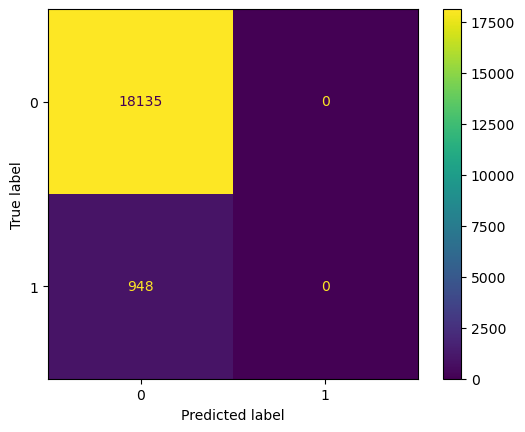

In [44]:
#Plotting it a confusion matrix for later comparissons
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot()

confusion_matrix(y_test,pred)

In [49]:
#Managing imbalance in the dataset
#NOTE: for downsampling/upsampling/SMOTE we need both the features and the target in one dataframe (only on training set)
trainset = pd.concat([X_train_transformed, y_train], axis=1)
trainset

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,DOB_YR_1,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_2,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_4,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_5,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_6,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_8,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_84,DOB_YR_85,DOB_YR_86,DOB_YR_87,DOB_YR_88,DOB_YR_89,DOB_YR_9,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_10,DOB_MM_11,DOB_MM_12,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,MINRDATE_YR_77,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_Y

In [50]:
trainset['TARGET_B'].value_counts()

TARGET_B
0    72434
1     3895
Name: count, dtype: int64

In [51]:
from sklearn.utils import resample

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [52]:
category_0

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,DOB_YR_1,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_2,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_4,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_5,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_6,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_8,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_84,DOB_YR_85,DOB_YR_86,DOB_YR_87,DOB_YR_88,DOB_YR_89,DOB_YR_9,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_10,DOB_MM_11,DOB_MM_12,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,MINRDATE_YR_77,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_Y

In [53]:
category_1

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,DOB_YR_1,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_2,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_4,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_5,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_6,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_8,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_84,DOB_YR_85,DOB_YR_86,DOB_YR_87,DOB_YR_88,DOB_YR_89,DOB_YR_9,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_10,DOB_MM_11,DOB_MM_12,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,MINRDATE_YR_77,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_Y

In [54]:
#Downsampling (undersampling)
category_0_undersampled = resample(category_0,
                                   replace=False,
                                   n_samples = len(category_1))

In [55]:
print(category_0_undersampled.shape)
print(category_1.shape)


(3895, 632)
(3895, 632)


In [56]:
#We concatenate one on top of the other, and we do randomly order the rows to avoid having all 0s at the top and 1s at the bottom
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0).sample(frac=1)

In [57]:
data_downsampled['TARGET_B'].value_counts()

TARGET_B
0    3895
1    3895
Name: count, dtype: int64

In [58]:
data_downsampled

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,DOB_YR_1,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_2,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_4,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_5,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_6,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_8,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_84,DOB_YR_85,DOB_YR_86,DOB_YR_87,DOB_YR_88,DOB_YR_89,DOB_YR_9,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_10,DOB_MM_11,DOB_MM_12,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,MINRDATE_YR_77,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_Y

In [59]:
#Splitting X and y
X_down_train = data_downsampled.drop('TARGET_B', axis=1)
y_down_train = data_downsampled['TARGET_B']

In [60]:
y_down_train.dtypes

dtype('int64')

In [61]:
#Checking model with data downsampled data

In [62]:
#Checking model with data downsampled data
LR = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
LR.fit(X_down_train, y_down_train)
pred = LR.predict(X_test_transformed)

#Printing precision, recall, and f1 for later analysis

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

#Checking score
LR.score(X_test_transformed, y_test)



precision:  0.06711656441717792
recall:  0.5770042194092827
f1:  0.12024620795779294


0.5805690929099199

array([[10532,  7603],
       [  401,   547]], dtype=int64)

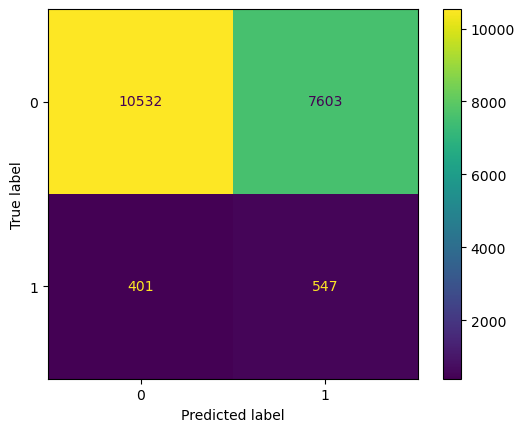

In [63]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot()

confusion_matrix(y_test,pred)